<a href="https://colab.research.google.com/github/Surajkr1166/Task-3/blob/main/CUSTOMER_SEGMENTATION_AND_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
#upload the dataset from local device
from google.colab import files
uploaded_data = files.upload()

Saving Online Retail.csv to Online Retail.csv


In [ ]:
#read the data
data = pd.read_csv('Online Retail.csv')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#clean the data set
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#remove the empty column
data.dropna(inplace=True)


In [ ]:
#check
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# Filter for valid transactions (Quantity > 0, UnitPrice > 0)
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]


In [ ]:
#create a total price column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
latest_date = data['InvoiceDate'].max()
print(latest_date)

2011-12-09 12:50:00


In [ ]:
#RFM Analysis (Recency, frequency and Monetory)
# Recency: Days since last purchase
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M') # Specify the correct format
latest_date = data['InvoiceDate'].max()
data['DaysSinceLastPurchase'] = (latest_date - data['InvoiceDate']).dt.days

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DaysSinceLastPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [ ]:
#Aggregating RFM metrices
rfm_data = data.groupby('CustomerID').agg({
    'DaysSinceLastPurchase': 'min',  # Recency
    'InvoiceNo': 'nunique',          # Frequency
    'TotalPrice': 'sum'              # Monetary
}).reset_index()

In [ ]:
rfm_data

,CustomerID,DaysSinceLastPurchase,InvoiceNo,TotalPrice
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
...,...,...,...,...
4333,18280.0,277,1,180.60
4334,18281.0,180,1,80.82
4335,18282.0,7,2,178.05
4336,18283.0,3,16,2094.88


In [ ]:
# Step 4: Normalize the data for clustering
scaler = StandardScaler()
# Use the correct column names from rfm_data
rfm_scaled = scaler.fit_transform(rfm_data[['DaysSinceLastPurchase', 'InvoiceNo', 'TotalPrice']])

In [ ]:
# Step 5: K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

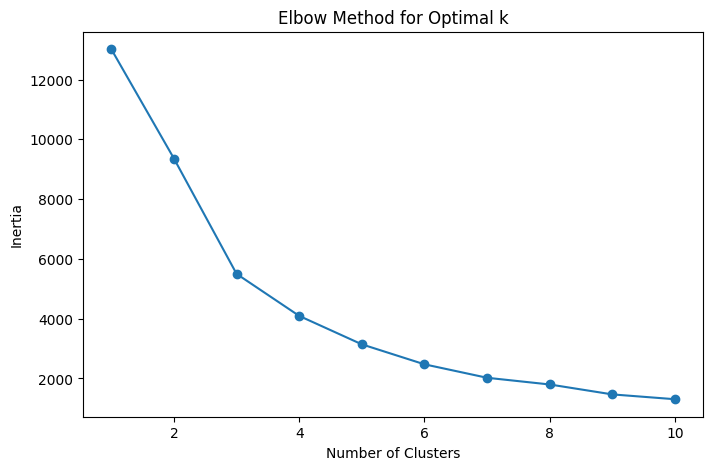

In [ ]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Analyze K-Means Clusters
print("\nK-Means Cluster Analysis:")
print(rfm_data.groupby('KMeans_Cluster').mean())



K-Means Cluster Analysis:
                  CustomerID  DaysSinceLastPurchase  InvoiceNo     TotalPrice
KMeans_Cluster                                                               
0               15289.128356              42.702685   3.682711    1359.049284
1               15347.791940             247.075914   1.552015     480.617480
2               15435.000000               6.384615  82.538462  127338.313846
3               15212.857843              14.500000  22.333333   12709.090490


In [ ]:
# Step 6: DBSCAN Clustering
# Fit DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust parameters as needed
rfm_data['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)


In [ ]:
# Analyze DBSCAN Clusters
print("\nDBSCAN Cluster Analysis:")
print(rfm_data.groupby('DBSCAN_Cluster').mean())


DBSCAN Cluster Analysis:
                  CustomerID  DaysSinceLastPurchase  InvoiceNo    TotalPrice  \
DBSCAN_Cluster                                                                 
-1              15193.354839              40.129032  58.806452  77711.211935   
 0              15301.178547              91.906431   3.879498   1509.719140   

                KMeans_Cluster  
DBSCAN_Cluster                  
-1                    2.580645  
 0                    0.377293  


In [ ]:
# Step 7: Silhouette Score Evaluation
kmeans_silhouette = silhouette_score(rfm_scaled, rfm_data['KMeans_Cluster'])
print(f"\nK-Means Silhouette Score: {kmeans_silhouette}")

dbscan_silhouette = silhouette_score(rfm_scaled, rfm_data['DBSCAN_Cluster'], metric='euclidean') \
    if len(set(rfm_data['DBSCAN_Cluster'])) > 1 else 'Not Applicable'
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")


K-Means Silhouette Score: 0.616212846765192
DBSCAN Silhouette Score: 0.8853782505856437


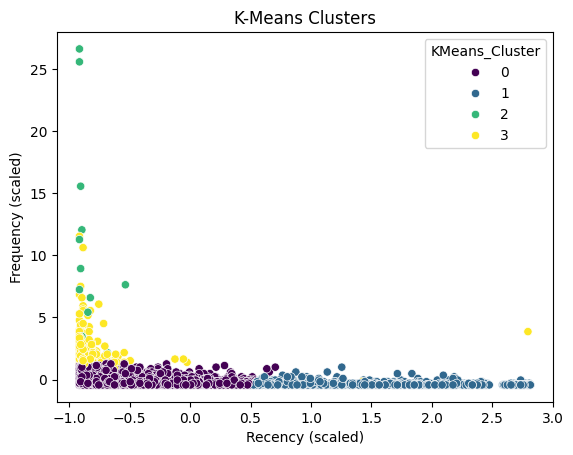

In [ ]:
# Step 8: Visualize Clusters (Optional)
# Scatter plot for K-Means clusters
sns.scatterplot(
    x=rfm_scaled[:, 0], y=rfm_scaled[:, 1], hue=rfm_data['KMeans_Cluster'], palette='viridis'
)
plt.title('K-Means Clusters')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.show()

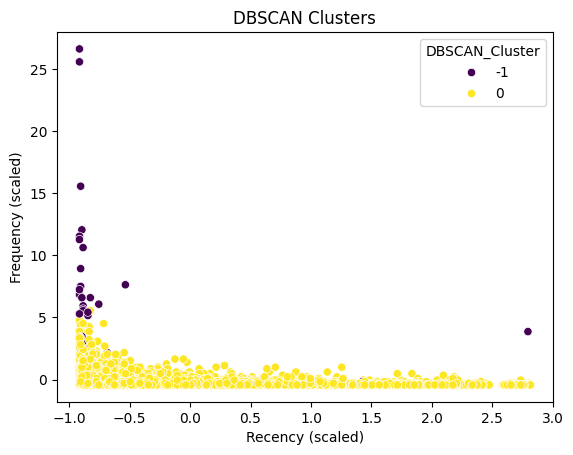

In [ ]:
# Scatter plot for DBSCAN clusters
sns.scatterplot(
    x=rfm_scaled[:, 0], y=rfm_scaled[:, 1], hue=rfm_data['DBSCAN_Cluster'], palette='viridis'
)
plt.title('DBSCAN Clusters')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.show()